In [1]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis

full_filename = "../data/by_article_fulltext_020920.jl"
advice_filename = "../data/genre_advice_full_021520.jl"
wl_filename = "../data/genre_WL_full_021520.jl"
policy_filename = "../data/genre_CP_full_021520.jl"


full_df = imp.init_df(full_filename, "full")
advice_sec_df = imp.init_df(advice_filename, "full")
wl_sec_df = imp.init_df(wl_filename, "full", genre="WL")
policy_sec_df = imp.init_df(policy_filename, "full")

full_df = full_df[full_df.year<2020]

print("done")


done


In [4]:
full_df["probnews"] = np.where(
        (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
        "yes",
        "no",
    )

full_df = full_df.drop(["bio", "time", "column1", "column2"], axis=1,)

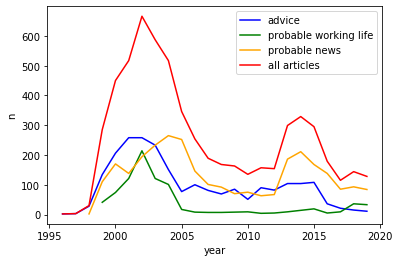

In [5]:
full_vis = vis.prep_per(full_df, group_by = "year", color = "red", test = False)

one_time_df = full_df[full_df.one_time == "yes"]
advice_df = full_df[full_df.advice == "yes"]
probnews_df = full_df[full_df.probnews == "yes"]

advice_vis = vis.prep_per(advice_df, group_by = "year")
one_time_vis = vis.prep_per(one_time_df, group_by = "year")
probnews_vis = vis.prep_per(probnews_df, group_by = "year")

sns.lineplot(x = "year", y = "n", color = "blue", legend="full", label="advice", data = advice_vis) 
sns.lineplot(x = "year", y = "n", color = "green", legend="full", label="probable working life", data = one_time_vis)
sns.lineplot(x = "year", y = "n", color = "orange", legend="full", label="probable news", data = probnews_vis)
sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

plt.savefig("../figs/article_types_over_time.png")

In [5]:
one_time_df[one_time_df.date_seq>7057].sort_values(by=["date_seq"]).head(3)

empties=0
wl_tags=0
for tags in wl_sec_df.tags:
    # print(tags)
    if tags =="[]":
        empties +=1
    elif "working life" in tags:
        wl_tags+=1

print(empties)
print(wl_tags)
print(len(wl_sec_df))

print("#################")

empties=0
wl_tags=0
# author_empties=0
for tags in full_df.tags:
    if tags=="[]":
        empties+=1
    elif "working life" in tags:
        wl_tags+=1
# for author in full_df.authors:
#     if author == "":
#         author_empties+=1

print(empties)
print(wl_tags)
# print(author_empties)
print(len(full_df))

108
116
224
#################
12
145
6112


In [7]:
# test advice for coverage

print(len(advice_df))
print(len(advice_sec_df))

2307
2364


In [6]:
# test one time authors whether their numbers are comparable to working life articles at this time

print(len(one_time_df[one_time_df.date_seq>6443]))
print(len(wl_sec_df))

# ...no, not comparable at all, so probably not a good idea to use one-time as a proxy for working life articles

114
224


In [8]:
print(len(probnews_df[probnews_df.date_seq>7057]))
print(len(policy_sec_df))

# ...no, not comparable at all, but maybe many of the news-type articles are beyond the 

389
66


In [11]:
advice_sec_df.head(2)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,author,n_posts_author,column1,column2,advice,one_time
0,2173,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,1998-01-30,0:00 am,"by ow that the holiday season is over, you have returned to your regular life, in the lab, i...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,peter fiske,56,no,yes,yes,no
1,2206,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,1998-02-27,0:00 am,by --miguel de cervantes any young scientists who explore nontraditional careers are seeking...,"[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",46,11,1996,peter fiske,56,no,yes,yes,no


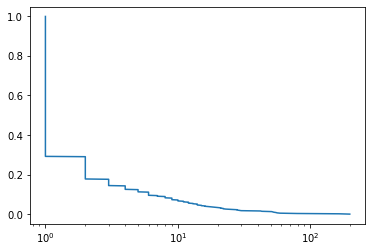

In [6]:
authors = advice_sec_df["authors"].value_counts()
authors_df = pd.DataFrame(authors)
authors_df.head(10)

plt.xscale(value = "log")
plt.plot(np.flip(np.sort(authors_df.authors)), np.linspace(0, 1, len(authors_df.authors), endpoint=False))

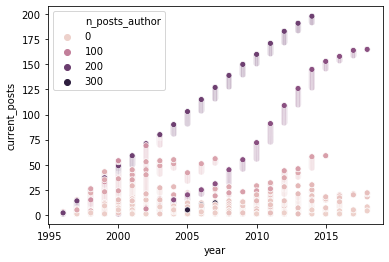

In [38]:
advice_sec_df = advice_sec_df.sort_values(by = "date_seq")
over_time = {"year":[],"current_posts":[],"author":[],"n_posts_author":[]}

authors_again = {}
for i in range(len(advice_sec_df)):
    author = advice_sec_df.iloc[i]["authors"]
    if author not in authors_again.keys():
        authors_again[author] = [1]
    else:
        authors_again[author].append(authors_again[author][-1]+1)

    year = advice_sec_df.iloc[i]["year"]
    tot_posts = advice_sec_df.iloc[i]["n_posts_author"]
    over_time["year"].append(year)
    over_time["author"].append(author)
    over_time["current_posts"].append(authors_again[author][-1])
    over_time["n_posts_author"].append(tot_posts)
    

over_time = pd.DataFrame(over_time)
# print(type(over_time))

sns.scatterplot(x = "year", y = "current_posts", hue = "n_posts_author", data = over_time)
# sns.pointplot(x = "year", y = "current_posts", data = over_time)
plt.title("number of posts author has written for each article")
plt.savefig("../figs/n_posts_author.png")

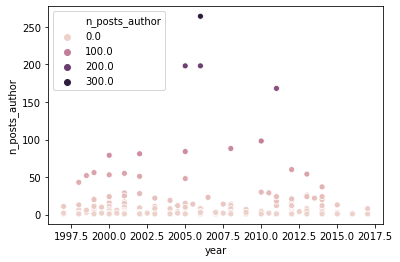

In [45]:
# average year for each author

avg_yr_author = advice_sec_df.groupby("authors").mean()

sns.scatterplot(y = "n_posts_author", x = "year", hue = "n_posts_author", data = avg_yr_author)

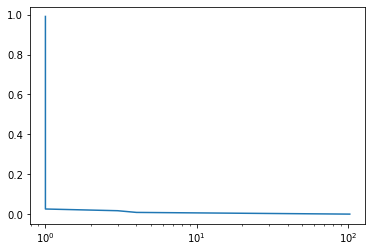

In [39]:
authors = wl_sec_df["authors"].value_counts()
authors_df = pd.DataFrame(authors)
authors_df.head(10)

plt.xscale(value = "log")
plt.plot(np.flip(np.sort(authors_df.authors)), np.linspace(0, 1, len(authors_df.authors), endpoint=False))

In [40]:
print(authors_df[authors_df.authors>1])

authors
                          103
, ,                         4
barbara a. wanchisen        3


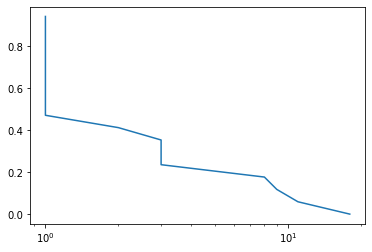

In [41]:
authors = policy_sec_df["authors"].value_counts()
authors_df = pd.DataFrame(authors)
authors_df.head(10)

plt.xscale(value = "log")
plt.plot(np.flip(np.sort(authors_df.authors)), np.linspace(0, 1, len(authors_df.authors), endpoint=False))

In [42]:
print(authors_df[authors_df.authors<3])

authors
devin powell                                           2
lily cohen                                             1
dalmeet singh chawla                                   1
rachel bernstein, donisha adams, elisabeth pain        1
meenakshi prabhune                                     1
naomi lubick                                           1
anthony king                                           1
stav dimitropoulos                                     1
tien nguyen                                            1
jane c. hu                                             1
